In [4]:
from sklearn.datasets import fetch_lfw_people

In [5]:
faces_dataset = fetch_lfw_people(min_faces_per_person=20, resize=0.4)

In [ ]:
X = faces_dataset.data
y = faces_dataset.target

target_names = faces_dataset.target_names
n_classes = len(target_names)
print(f"Number of classes: {n_classes}")

Number of classes: 62


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=98)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2116, 1850), (2116,), (907, 1850), (907,))

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
model = StandardScaler()
X_train_scaled = model.fit_transform(X_train)
X_test_scaled = model.transform(X_test)

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=150, whiten=True, random_state=98)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [15]:
from sklearn.svm import SVC

In [26]:
model = SVC(kernel='rbf', class_weight='balanced', C=10, gamma=0.001)

model.fit(X_train_pca, y_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,0.001
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [27]:
from sklearn.metrics import accuracy_score, classification_report

In [28]:
y_pred = model.predict(X_test_pca)
print(f"Accuracy on test score: {accuracy_score(y_pred, y_test)}")
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy on test score: 0.5964718853362734
                           precision    recall  f1-score   support

         Alejandro Toledo       0.33      0.50      0.40         8
             Alvaro Uribe       0.50      0.50      0.50        10
          Amelie Mauresmo       1.00      0.57      0.73         7
             Andre Agassi       0.29      0.20      0.24        10
           Angelina Jolie       0.50      0.33      0.40         6
             Ariel Sharon       0.25      0.31      0.28        16
    Arnold Schwarzenegger       0.28      0.38      0.32        13
     Atal Bihari Vajpayee       0.60      0.43      0.50         7
             Bill Clinton       0.44      0.40      0.42        10
             Carlos Menem       0.75      0.33      0.46         9
             Colin Powell       0.75      0.75      0.75        77
            David Beckham       0.11      0.17      0.13         6
          Donald Rumsfeld       0.54      0.78      0.64        36
         George Ro

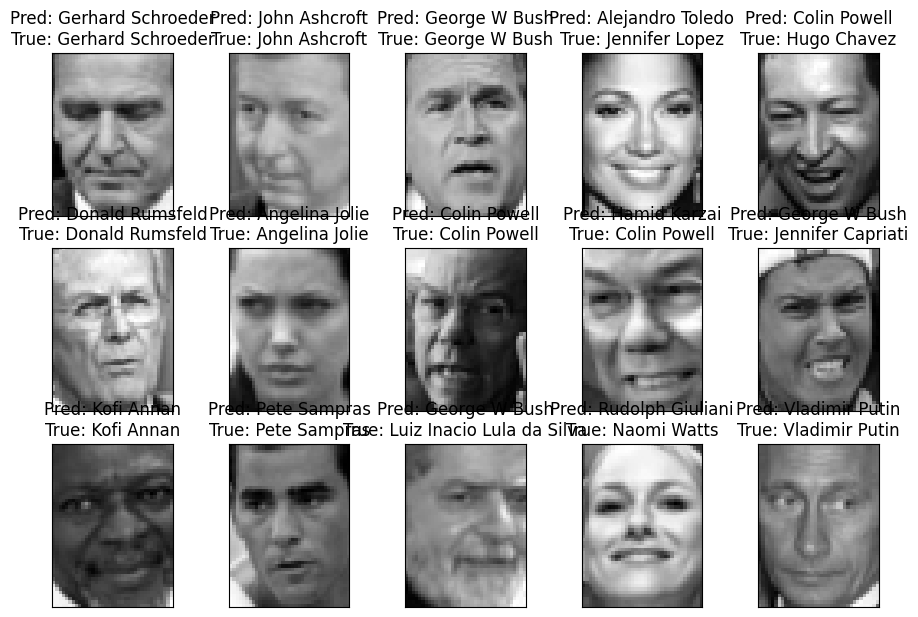

In [31]:
import matplotlib.pyplot as plt

def plot_gallery(images, titles, h, w, n_row=3, n_col=5):
    plt.figure(figsize=(2.2 * n_col, 2.4 * n_row))
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

h, w = faces_dataset.images.shape[1:3]
titles = [f"Pred: {target_names[y_pred[i]]}\nTrue: {target_names[y_test[i]]}" for i in range(15)]
plot_gallery(X_test, titles, h, w)
plt.show()
